# **Twitter sentiment analysis**
 Data source: Udemy Course 
"Machine Learning e Data Science com Python de A a Z"


# 1. Importing and installing libraries

In [ ]:
!pip install spacy==2.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 5.3 MB/s 
     |████████████████████████████████| 2.2 MB 38.0 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
import spacy
spacy.__version__

'2.2.3'

In [ ]:
!python3 -m spacy download pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.2 MB 1.4 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=9ac698177b5fcfb75bd8736449c095c6f3b577e4c9e095739aa17d5cd780fbb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_jd216uk/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# 2. Database loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_base = pd.read_csv('/content/Train50.csv', encoding='utf-8', sep=';')
test_base = pd.read_csv('/content/Test.csv', encoding='utf-8', sep=';')

In [ ]:
train_base.shape, test_base.shape

((50000, 5), (5000, 5))

In [ ]:
train_base.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [ ]:
train_base.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


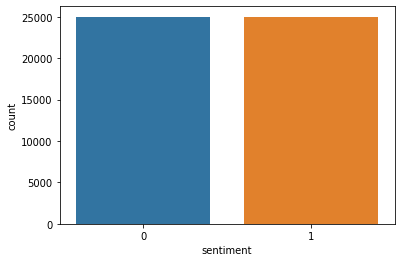

In [ ]:
sns.countplot(train_base['sentiment'], label = 'Contagem');

In [ ]:
train_base.drop(['id','tweet_date','query_used'], axis=1, inplace=True)

In [ ]:
train_base.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


There's no Null values

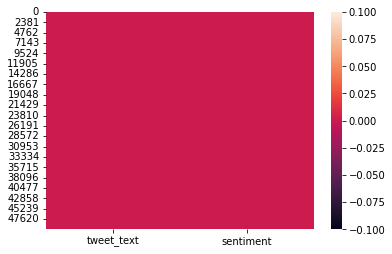

In [ ]:
sns.heatmap(pd.isnull(train_base));

In [ ]:
test_base.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [ ]:
test_base.drop(['id','tweet_date','query_used'], axis=1, inplace=True)

In [ ]:
test_base

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1
...,...,...
4995,@ol_cdanilo parece livro de autoajuda :(,0
4996,@tatazoquita aaaaa sinto muito :((,0
4997,To começando a sentir dor de novo e meu irmão ...,0
4998,@ichbintw parece que no dia que toma a vacina ...,0


There's no Null values

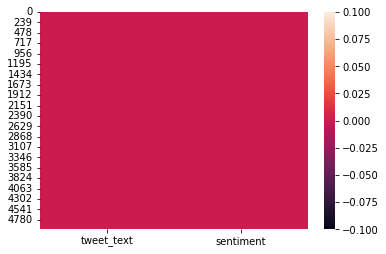

In [ ]:
sns.heatmap(pd.isnull(test_base));

# 3. Function for pre-processing texts

In [ ]:
pln = spacy.load('pt')

In [ ]:
pln

In [ ]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
print(stop_words)

{'as', 'partir', 'numa', 'último', 'cujo', 'uns', 'cá', 'tendes', 'alguns', 'vossos', 'possível', 'maioria', 'fazes', 'vai', 'vindo', 'meio', 'seus', 'estiveste', 'nova', 'faço', 'agora', 'meu', 'mas', 'vos', 'números', 'foram', 'boa', 'quanto', 'estivestes', 'num', 'quinta', 'próprio', 'algumas', 'põe', 'sem', 'for', 'é', 'seria', 'vossas', 'grande', 'através', 'que', 'sabe', 'querem', 'podem', 'vocês', 'sois', 'estivemos', 'novo', 'nada', 'estás', 'maior', 'além', 'dar', 'desse', 'antes', 'do', 'des', 'dentro', 'porque', 'tão', 'me', 'aquilo', 'quinto', 'vens', 'ir', 'és', 'primeiro', 'até', 'deste', 'você', 'tipo', 'todas', 'disso', 'adeus', 'são', 'não', 'fazemos', 'teu', 'puderam', 'maiorias', 'vossa', 'terceira', 'novas', 'tempo', 'isto', 'por', 'deve', 'obrigado', 'ademais', 'então', 'portanto', 'fui', 'qualquer', 'quieto', 'comprido', 'sempre', 'vinte', 'sexta', 'porquanto', 'perto', 'lado', 'duas', 'máximo', 'algo', 'nosso', 'na', 'quê', 'quem', 'esta', 'treze', 'certeza', 'fa

In [ ]:
len(stop_words)

413

In [ ]:
import re

In [ ]:
def preprocessament(texto):
  #Small letters
  texto = texto.lower()
  #User name
  texto = re.sub(r'@[A-Za-z0-9$-_@.&+]+', ' ', texto)
  #URLS
  texto = re.sub(r'https?://[A-Za-z0-9./]+', ' ', texto)
  #Blank spaces
  texto = re.sub(r' +', ' ', texto)
  #Emotions
  emotion_list = { ':)': 'emocao positiva',
                  ':d': 'emocao positiva',
                  ':(': 'emocao negativa'}
  for emotion in emotion_list:
    texto = texto.replace(emotion, emotion_list[emotion])

  document = pln(texto)
  #lematization
  lista = []
  for token in document:
    #lista.append(token.text)
    lista.append(token.lemma_)
#remove stop words and punctuation
  lista = [word for word in lista if word not in stop_words and word not in punctuation]
# transform list in to string
  lista = ' '.join([str(element) for element in lista if not element.isdigit()])

  return lista

In [ ]:
teste = preprocessament('Estou aPrendendo 1 10 23 processamento de linguagem natural')
teste

'aprender processamento linguagem natural'

# 4. Database pre-processing

4.1. Data cleaning

In [ ]:
train_base.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [ ]:
train_base.tail()

,tweet_text,sentiment
49995,:( é tão lindo que dói https://t.co/GqnpgyWWxB,0
49996,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",0
49997,eu te amo tanto minja vidinha meu bem mais pre...,0
49998,@itsLary @jessboluda Pfvor :(,0
49999,@Renk_lol Passa ano Entra ano Eu nao desisto d...,0


In [ ]:
train_base['tweet_text'] = train_base['tweet_text'].apply(preprocessament)

In [ ]:
train_base.head()

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocao po...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1


In [ ]:
test_base['tweet_text'] = test_base['tweet_text'].apply(preprocessament)

4.2. Class handling

In [ ]:
train_base_final = []
for texto, emotion in zip(train_base['tweet_text'], train_base['sentiment']):
  #print(texto, emocao)
  if emotion == 1:
    dic = ({'POSITIVE': True, 'NEGATIVE': False})
  elif emotion == 0:
    dic = ({'POSITIVE': False, 'NEGATIVE': True})

  train_base_final.append([texto, dic.copy()])

In [ ]:
len(train_base_final)

50000

In [ ]:
train_base_final

[['  o pessoa certo parir seriar o valer e azevedo emocao positivo',
  {'NEGATIVE': False, 'POSITIVE': True}],
 ['  parir mim precisamente o contrário emocao positivo vir o chuva e vir o disposição emocao positivo',
  {'NEGATIVE': False, 'POSITIVE': True}],
 ['video hoje ... pensar falar sobrar o meter csgo e sobrar o paginar alguem umar sugestao querer falar sobrar cenario nacional emocao positivo',
  {'NEGATIVE': False, 'POSITIVE': True}],
 ['aaaaaaaa amar polaroids expressar o quantum to apaixonar vdd ✨ 💖 🎈 🎉 🎊 esperar outro pessoa conseguir ganhar emocao positivo',
  {'NEGATIVE': False, 'POSITIVE': True}],
 ['valorizar o coração menino vc diferente o sorrir e d ❤ ️ — valorizar mundo o vidar diferente emocao positivo',
  {'NEGATIVE': False, 'POSITIVE': True}],
 ['  amigo to emocao positivo', {'NEGATIVE': False, 'POSITIVE': True}],
 ['  bravo jairo emocao positivo', {'NEGATIVE': False, 'POSITIVE': True}],
 ['  socorrer ksoaksosks achar to o caixa som :p',
  {'NEGATIVE': False, 'POSIT

# 5. Classifier creation

In [ ]:
model = spacy.blank('pt')
category = model.create_pipe("textcat")
category.add_label("POSITIVE")
category.add_label("NEGATIVE")
model.add_pipe(category)
historic = []

In [ ]:
model.begin_training()
for epoch in range(3):
  random.shuffle(train_base_final)
  losses = {}
  for batch in spacy.util.minibatch(train_base_final, 512):
    textos = [model(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    model.update(textos, annotations, losses=losses)
    historic.append(losses)
  if epoch % 100 == 0:
    print(losses)
    

{'textcat': 5.270756740552961e-07}


In [ ]:
historic_loss = []
for i in historic:
  historic_loss.append(i.get('textcat'))

In [ ]:
historic_loss= np.array(historic_loss)
historic_loss

array([1.15872550e-05, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
       5.27075674e-07, 5.27075674e-07, 5.27075674e-07, 5.27075674e-07,
      

Text(0, 0.5, 'Error')

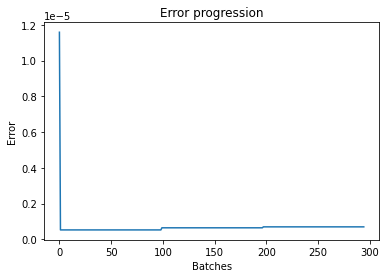

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historic_loss)
plt.title('Error progression')
plt.xlabel('Batches')
plt.ylabel('Error')

In [ ]:
model.to_disk("model")

# 6. Tests with one sentence

In [ ]:
load_model = spacy.load("model")
load_model

In [ ]:
positive_text = test_base['tweet_text'][21]
positive_text

'  ficar feliz q recíproco emocao positivo'

In [ ]:
predition = load_model(positive_text)
predition

  ficar feliz q recíproco emocao positivo

In [ ]:
predition.cats

{'NEGATIVE': 4.539786823443137e-05, 'POSITIVE': 0.9998490810394287}

In [ ]:
positive_text = 'eu gosto muito de você'
positive_text = preprocessament(positive_text)
positive_text


'gostar'

In [ ]:
load_model(positive_text).cats

{'NEGATIVE': 0.00015512533718720078, 'POSITIVE': 0.9178078770637512}

In [ ]:
test_base['tweet_text'][4000]

'tô triste filmar mulan o mushu emocao negativo'

In [ ]:
negative_text = test_base['tweet_text'][4000]
prediction = load_model(negative_text)
prediction.cats

{'NEGATIVE': 0.9999545812606812, 'POSITIVE': 0.0034209282603114843}

# 7. Model evaluation

7.1. Evaluation on the test basis

In [ ]:
test_base.head()

,tweet_text,sentiment
0,obrigar emocao positivo,1
1,pa puta parir emocao positivo,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocao pos...,1
4,casar zé e o morrer sono chegar o casar e fica...,1


In [ ]:
test_base.tail()

,tweet_text,sentiment
4995,parecer livrar autoajuda emocao negativo,0
4996,aaaaa sentir emocao negativo,0
4997,to começar o sentir dor e irmão sumir remédio ...,0
4998,parecer o dia tomar o vacinar n beber emocao...,0
4999,poxaa achar q q vc ta falar o q adiar p dia ...,0


In [ ]:
test_base.shape

(5000, 2)

In [ ]:
predictions= []
for texto in test_base['tweet_text']:
  #print(texto)
  prediction = load_model(texto)
  predictions.append(prediction.cats)

In [ ]:
final_predictions = []
for predict in predictions:
  if predict['POSITIVE'] > predict['NEGATIVE']:
    final_predictions.append(1)
  else:
    final_predictions.append(0)

final_predictions = np.array(final_predictions)

In [ ]:
final_predictions

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
real = test_base['sentiment'].values
real

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(real, final_predictions)

0.9984

In [ ]:
cm = confusion_matrix(real, final_predictions)
cm

array([[2494,    6],
       [   2, 2498]])